<a href="https://colab.research.google.com/github/sanscurtodavis/drexel_research/blob/main/notes_11142024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo pip3 install keras

### Import modules




In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow import keras
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import r2_score
import seaborn as sns
import numpy as np
import pandas as pd

## Data acquistion and preprocessing

In [4]:
start_date = "2024-01-01"
end_date = "2024-06-01"

# Define tickers for Nvidia, Amazon, Bitcoin, and Ethereum
tickers = ['GLD', 'SPY', 'SMH', 'NVDA', 'AMZN', 'BTC-USD', 'ETH-USD']
data = yf.download(tickers, start=start_date, end=end_date, interval="1d")['Close']

# Drop any NaN rows within the data
data = data.dropna()

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

[*********************100%***********************]  7 of 7 completed


## Noramlized stock and cryptocurrency data plotted against each other

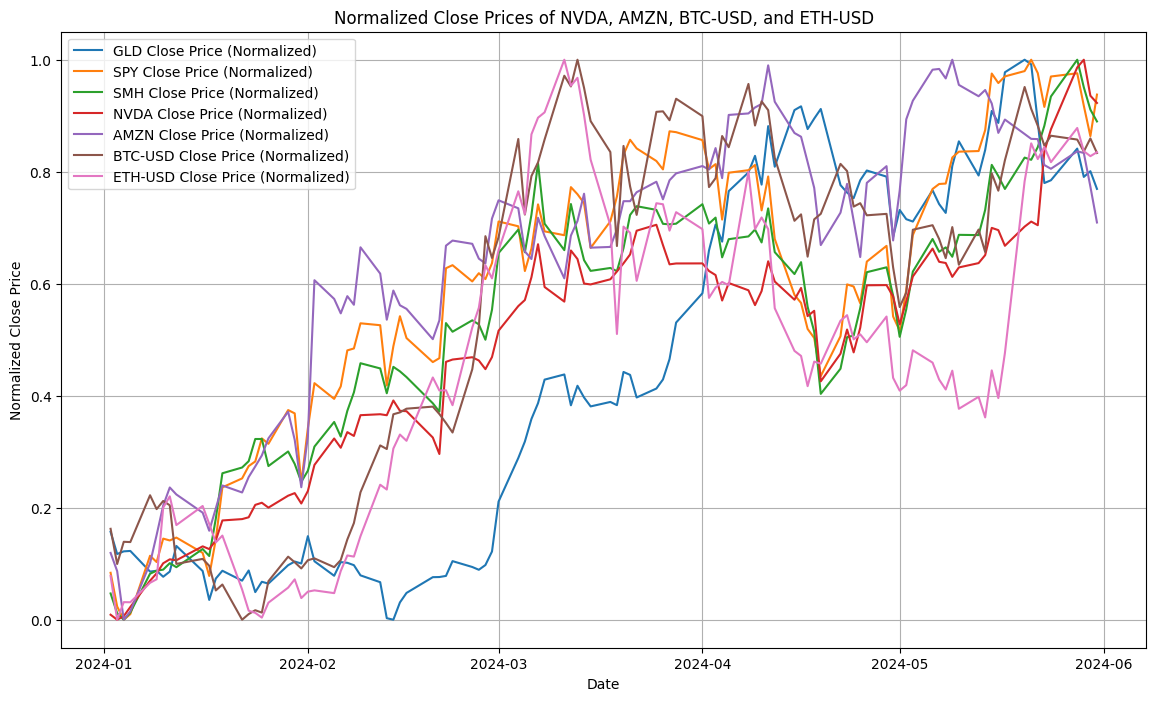

In [5]:
# Plot the normalized close prices
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(data_normalized[ticker], label=f'{ticker} Close Price (Normalized)')

plt.title('Normalized Close Prices of NVDA, AMZN, BTC-USD, and ETH-USD')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.grid()
plt.show()

## Correlation matrix creation

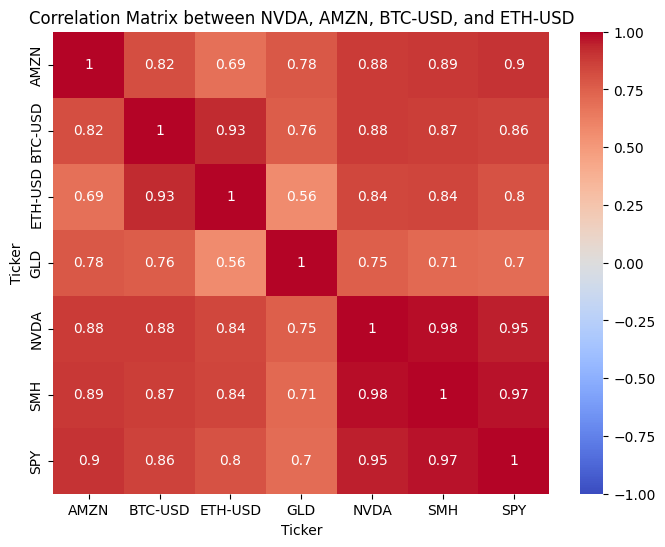

In [6]:
# Calculate the correlation matrix
correlation_matrix = data_normalized.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix between NVDA, AMZN, BTC-USD, and ETH-USD")
plt.show()

## Machine learning component with Linear Regression

In [ ]:
# Step 1: Calculate daily returns
returns = data.pct_change().dropna()

print(returns)

Ticker                         AMZN   BTC-USD   ETH-USD      NVDA
Date                                                             
2024-01-03 00:00:00+00:00 -0.009738 -0.046928 -0.061581 -0.012436
2024-01-04 00:00:00+00:00 -0.026268  0.031081  0.026360  0.009018
2024-01-05 00:00:00+00:00  0.004634 -0.000390 -0.000172  0.022897
2024-01-08 00:00:00+00:00  0.026577  0.063579  0.028381  0.064281
2024-01-09 00:00:00+00:00  0.015225 -0.017687  0.005055  0.016975
...                             ...       ...       ...       ...
2024-05-24 00:00:00+00:00 -0.001657  0.008782 -0.013236  0.025723
2024-05-28 00:00:00+00:00  0.007745 -0.003355  0.030406  0.069804
2024-05-29 00:00:00+00:00 -0.000714 -0.010515 -0.020066  0.008112
2024-05-30 00:00:00+00:00 -0.014834  0.011644 -0.004344 -0.037666
2024-05-31 00:00:00+00:00 -0.016061 -0.012778  0.003517 -0.007846

[104 rows x 4 columns]


In [ ]:

# Step 2: Separate features and targets
X = returns[['BTC-USD', 'ETH-USD']]
y_nvda = returns['NVDA']
y_amzn = returns['AMZN']

# Step 3: Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data to add the timesteps dimension (1 timestep in this case)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Step 4: Split data into training and testing sets for NVDA
X_train_nvda, X_test_nvda, y_train_nvda, y_test_nvda = train_test_split(X, y_nvda, test_size=0.2, random_state=42)

# Step 5: Define and train LSTM model for NVDA
model_nvda = Sequential()
model_nvda.add(LSTM(units=50, activation='relu', input_shape=(X_train_nvda.shape[1], X_train_nvda.shape[2])))
model_nvda.add(Dense(1))
model_nvda.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model_nvda.fit(X_train_nvda, y_train_nvda, epochs=50, batch_size=32, verbose=1)

# Step 6: Predict NVDA values and evaluate R² score
y_pred_nvda = model_nvda.predict(X_test_nvda).flatten()
r2_nvda = r2_score(y_test_nvda, y_pred_nvda)

# Step 7: Split data into training and testing sets for AMZN
X_train_amzn, X_test_amzn, y_train_amzn, y_test_amzn = train_test_split(X, y_amzn, test_size=0.2, random_state=42)

# Step 8: Define and train LSTM model for AMZN
model_amzn = Sequential()
model_amzn.add(LSTM(units=50, activation='relu', input_shape=(X_train_amzn.shape[1], X_train_amzn.shape[2])))
model_amzn.add(Dense(1))
model_amzn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model_amzn.fit(X_train_amzn, y_train_amzn, epochs=50, batch_size=32, verbose=1)

# Step 9: Predict AMZN values and evaluate R² score
y_pred_amzn = model_amzn.predict(X_test_amzn).flatten()
r2_amzn = r2_score(y_test_amzn, y_pred_amzn)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0012   
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010     
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011     
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.8404e-04 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0703e-04 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6476e-04 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010     
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1977e-04 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4744e-04 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 
Epoch 16/50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.6796e-04
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8866e-04 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9699e-04 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1858e-04 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2305e-04 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6326e-04 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5237e-04 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3057e-04 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6756e-04 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4050e-04 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8647e-04 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6676e-04 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3832e-04 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4061e-04 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss

In [ ]:
# Print results
print(f"R² Score for NVDA (Predicted from BTC and ETH): {r2_nvda:.2f}")
print(f"R² Score for AMZN (Predicted from BTC and ETH): {r2_amzn:.2f}")

R² Score for NVDA (Predicted from BTC and ETH): -0.05
R² Score for AMZN (Predicted from BTC and ETH): -0.05


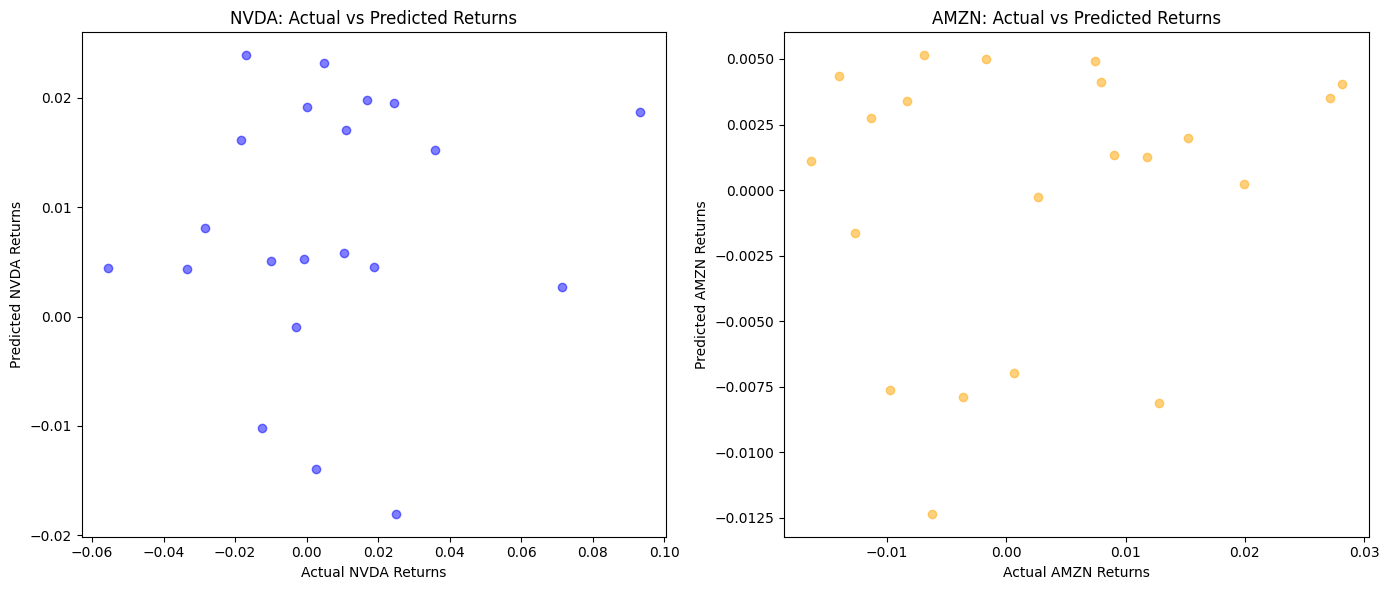

In [ ]:
# Plot predicted vs actual returns for NVDA and AMZN
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_nvda, y_pred_nvda, alpha=0.5, color="blue")
plt.xlabel("Actual NVDA Returns")
plt.ylabel("Predicted NVDA Returns")
plt.title("NVDA: Actual vs Predicted Returns")

plt.subplot(1, 2, 2)
plt.scatter(y_test_amzn, y_pred_amzn, alpha=0.5, color="orange")
plt.xlabel("Actual AMZN Returns")
plt.ylabel("Predicted AMZN Returns")
plt.title("AMZN: Actual vs Predicted Returns")

plt.tight_layout()
plt.show()